<a href="https://colab.research.google.com/github/DHANA-SRINIVASAN/LTVS_Tensorflow_Basic/blob/main/ML_Tf_TVS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

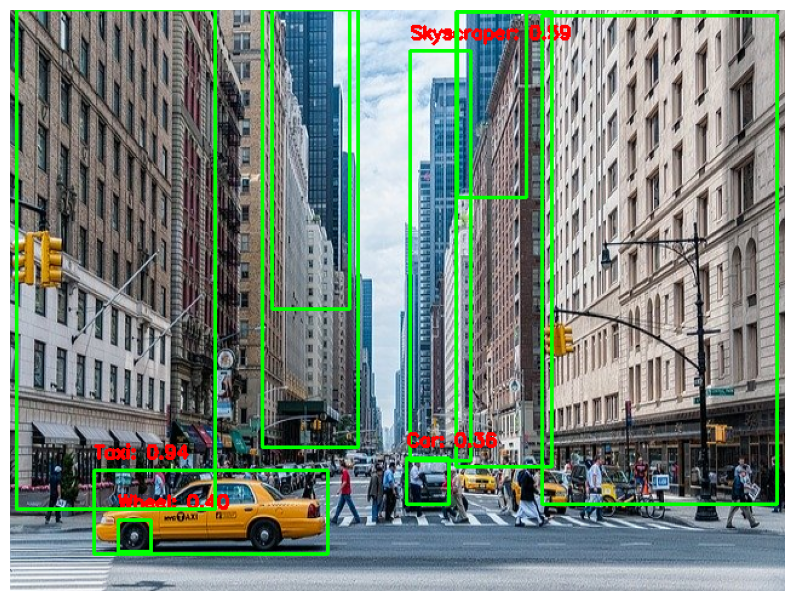

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the pre-trained object detection model from TensorFlow Hub
model_url = "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1"
model = hub.load(model_url)
detector = model.signatures['default']  # Access the default signature

# Function to load and preprocess the image
def load_image(path):
    img = cv2.imread(path)
    if img is None:
        raise ValueError(f"Image at path '{path}' could not be loaded.")
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img_rgb, (640, 480))
    return img_resized

# Function to perform object detection
def detect_objects(image):
    converted_img = tf.image.convert_image_dtype(image, tf.float32)[tf.newaxis, ...]
    result = detector(converted_img)
    return {key: value.numpy() for key, value in result.items()}

# Function to draw bounding boxes on the image
def draw_boxes(image, boxes, class_names, scores, max_boxes=10, min_score=0.1):
    for i in range(min(len(boxes), max_boxes)):
        if scores[i] >= min_score:
            ymin, xmin, ymax, xmax = boxes[i]
            start_point = (int(xmin * image.shape[1]), int(ymin * image.shape[0]))
            end_point = (int(xmax * image.shape[1]), int(ymax * image.shape[0]))
            cv2.rectangle(image, start_point, end_point, (0, 255, 0), 2)
            label = f"{class_names[i].decode('ascii')}: {scores[i]:.2f}"
            cv2.putText(image, label, (start_point[0], start_point[1]-10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
    return image

# Main function
def main():
    image_path = '/content/8.jpg'  # Updated image path
    image = load_image(image_path)
    result = detect_objects(image)
    image_with_boxes = draw_boxes(image.copy(), result["detection_boxes"],
                                  result["detection_class_entities"], result["detection_scores"])
    plt.figure(figsize=(10, 8))
    plt.imshow(image_with_boxes)
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    main()
